# Data Preprocessing and EDA

In [1]:
import pandas as pd
import numpy as np

import sklearn
import sklearn.linear_model as sl
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GroupShuffleSplit, GridSearchCV
from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

import seaborn as sns

from io import StringIO
import sys

# Data Pre-processing

In [2]:
df = pd.read_csv("nevada_weather.csv")
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'Temperature',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'DNI', 'Fill Flag', 'GHI', 'Ozone', 'Relative Humidity',
       'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'is_day'],
      dtype='object')

In [3]:
# Mapping isDay (false/true) -> (0/1)
df.replace(to_replace=True, value=1, inplace=True)
df.replace(to_replace=False, value=0, inplace=True)

In [6]:
# Dropping Year Column
df.drop("Year",axis=1, inplace=True)

In [7]:
df.columns

Index(['Month', 'Day', 'Hour', 'Minute', 'DHI', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DNI',
       'Fill Flag', 'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed', 'is_day'],
      dtype='object')

In [8]:
df.drop(["DHI", "Clearsky DHI", "Clearsky DNI", "Clearsky GHI", "DNI", "Fill Flag", "Ozone"], axis = 1, inplace=True)

In [9]:
df.describe()

,Month,Day,Hour,Minute,Temperature,Cloud Type,Dew Point,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,is_day
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,6.526027,15.720548,11.500000,25.000000,15.841229,1.685350,5.581117,234.198973,60.047767,89.685198,0.202932,952.272983,1.375053,216.568988,2.147333,0.509741
std,3.447884,8.796331,6.922252,17.078414,8.617613,2.750121,4.969231,321.737479,29.072701,38.422827,0.031863,4.103100,0.573725,102.774878,1.306880,0.499910
min,1.000000,1.000000,0.000000,0.000000,-3.000000,0.000000,-20.500000,0.000000,3.400000,11.950000,0.120000,936.000000,0.200000,0.000000,0.100000,0.000000
25%,4.000000,8.000000,5.750000,10.000000,9.400000,0.000000,3.300000,0.000000,34.570000,58.660000,0.180000,950.000000,1.000000,158.000000,1.100000,0.000000
50%,7.000000,16.000000,11.500000,25.000000,14.400000,0.000000,6.400000,0.000000,60.290000,89.365000,0.220000,952.000000,1.300000,246.000000,1.800000,1.000000
75%,10.000000,23.000000,17.250000,40.000000,21.300000,3.000000,9.000000,450.000000,88.140000,120.960000,0.220000,955.000000,1.700000,293.000000,2.900000,1.000000
max,12.000000,31.000000,23.000000,50.000000,39.700000,9.000000,16.700000,1063.000000,100.000000,168.050000,0.250000,966.000000,3.400000,360.000000,8.800000,1.000000


In [10]:
# Mapping the data
total_records = len(df)
features = df[:total_records-288].drop('GHI', axis=1).reset_index()
output = df['GHI'][288:].reset_index()
df = pd.concat([features, output], join='inner', axis=1)
df.drop(['index'], axis=1)

,Month,Day,Hour,Minute,Temperature,Cloud Type,Dew Point,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,is_day,GHI
0,1,1,0,0,0.6,0,-3.7,72.88,167.61,0.14,954,0.4,47,0.5,0,0
1,1,1,0,10,0.5,0,-3.7,73.41,167.56,0.14,954,0.4,53,0.5,0,0
2,1,1,0,20,0.4,0,-3.7,73.94,167.14,0.14,954,0.4,60,0.5,0,0
3,1,1,0,30,0.4,0,-3.7,73.94,166.38,0.14,954,0.4,67,0.5,0,0
4,1,1,0,40,0.3,0,-3.8,73.73,165.33,0.14,954,0.4,74,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52267,12,29,23,10,6.2,6,6.2,100.00,163.28,0.22,952,1.6,180,0.9,0,0
52268,12,29,23,20,6.2,6,6.2,100.00,164.68,0.22,952,1.6,175,0.9,0,0
52269,12,29,23,30,6.3,6,6.3,100.00,165.89,0.22,952,1.6,170,0.9,0,0
52270,12,29,23,40,6.3,6,6.3,100.00,166.84,0.22,952,1.6,164,0.9,0,0


## Plots

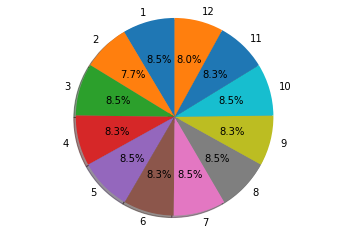

In [11]:
column = 'Month'
labels = df[column].unique()
sizes = []

for label in labels:
  sizes.append(len(df[df[column] == label]))

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

/home/kushal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day'>

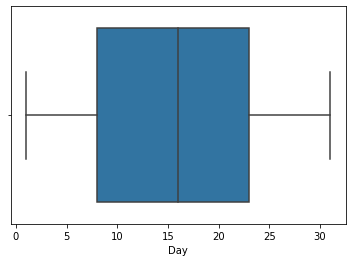

In [12]:
sns.boxplot(df['Day'])

<AxesSubplot:>

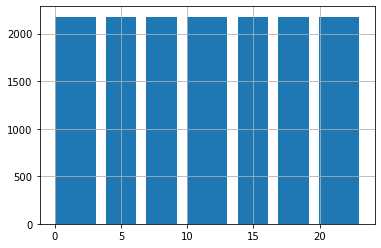

In [13]:
df['Hour'].hist(bins=30)

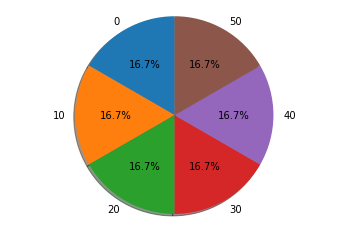

In [14]:
column = 'Minute'
labels = df[column].unique()
sizes = []

for label in labels:
  sizes.append(len(df[df[column] == label]))

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

/home/kushal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

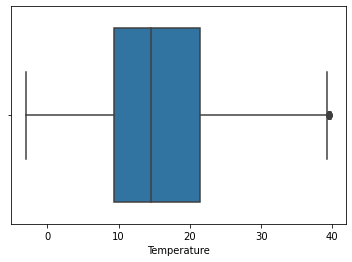

In [15]:
sns.boxplot(df['Temperature'])

/home/kushal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cloud Type'>

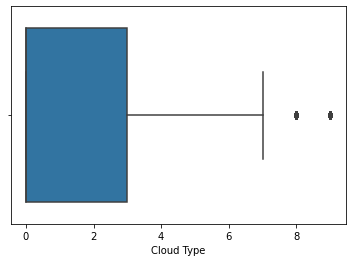

In [16]:
sns.boxplot(df['Cloud Type'])

/home/kushal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dew Point'>

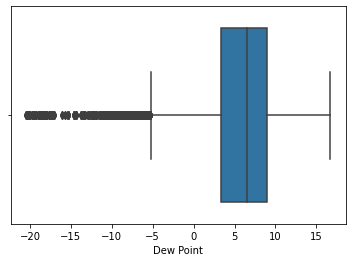

In [17]:
sns.boxplot(df['Dew Point'])

/home/kushal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Relative Humidity'>

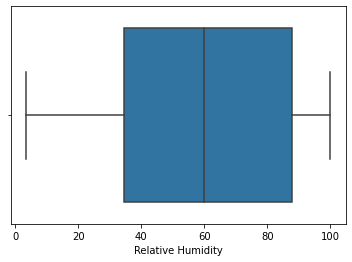

In [18]:
sns.boxplot(df['Relative Humidity'])

/home/kushal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Surface Albedo'>

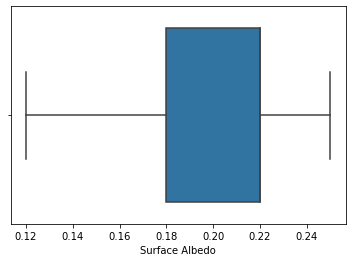

In [19]:
sns.boxplot(df['Surface Albedo'])

/home/kushal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Solar Zenith Angle'>

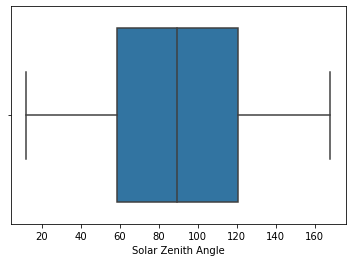

In [20]:
sns.boxplot(df['Solar Zenith Angle'])

/home/kushal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Precipitable Water'>

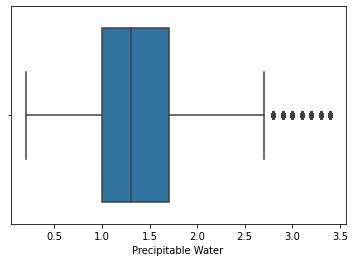

In [21]:
sns.boxplot(df['Precipitable Water'])

/home/kushal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure'>

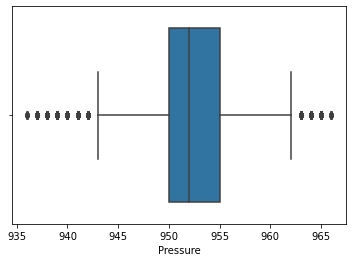

In [22]:
sns.boxplot(df['Pressure'])

/home/kushal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind Direction'>

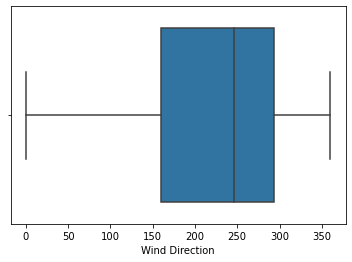

In [23]:
sns.boxplot(df['Wind Direction'])

/home/kushal/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind Speed'>

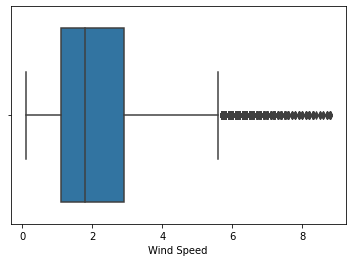

In [24]:
sns.boxplot(df['Wind Speed'])

<AxesSubplot:>

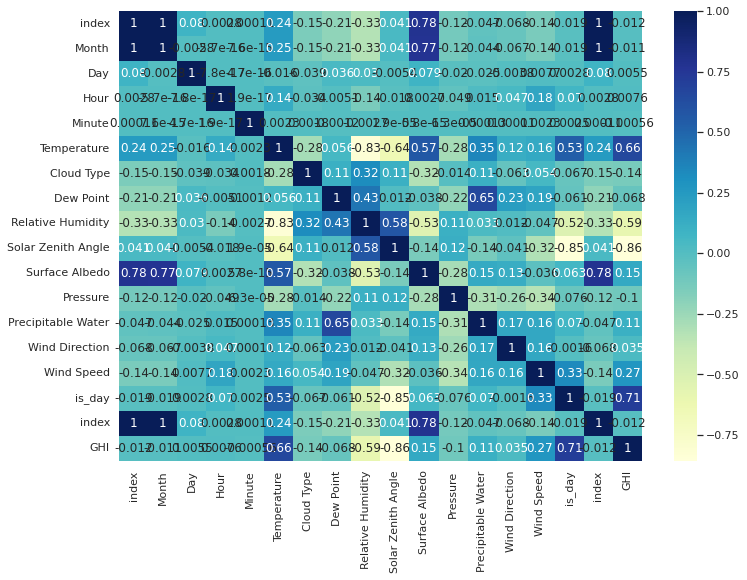

In [30]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
sns.set(rc={'figure.figsize':(20,20)})  
# displaying heatmap
dataplot